<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem5/%D0%B2_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C_%D0%9B%D0%A05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Лабораторная работа #5

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.linear_model import (LinearRegression, LassoCV, RidgeCV, Lasso, Ridge )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer)
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.linear_model import (ElasticNet, ElasticNetCV)

## 1. Загрузить данные day.csv

In [4]:
## https://archive.ics.uci.edu/ml/datasets/Bike%20Sharing%20Dataset
bike = pd.read_csv('/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/sem5/Bike-Sharing-Dataset.zip (Unzipped Files)/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
len(bike), bike['instant'].nunique()

(731, 731)

## 2.Сделать предварительный анализ данных: шкалы измерения, типы данных, корреляцию и т.п.

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()
# Пустых значений нет
# Все данные числовые, кроме столбца (dteday)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


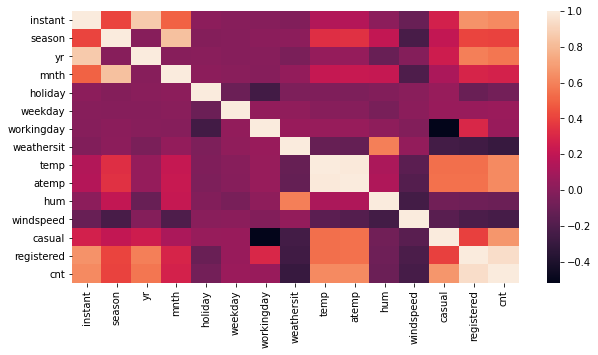

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(bike.corr(), ax=ax)

## 3. Визуализировать данные

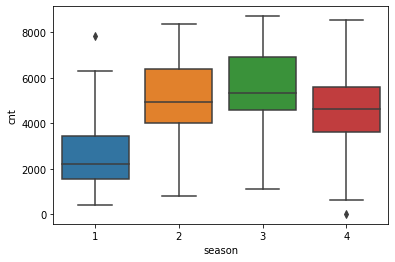

In [9]:
sns.boxplot(x='season', y='cnt', data=bike)

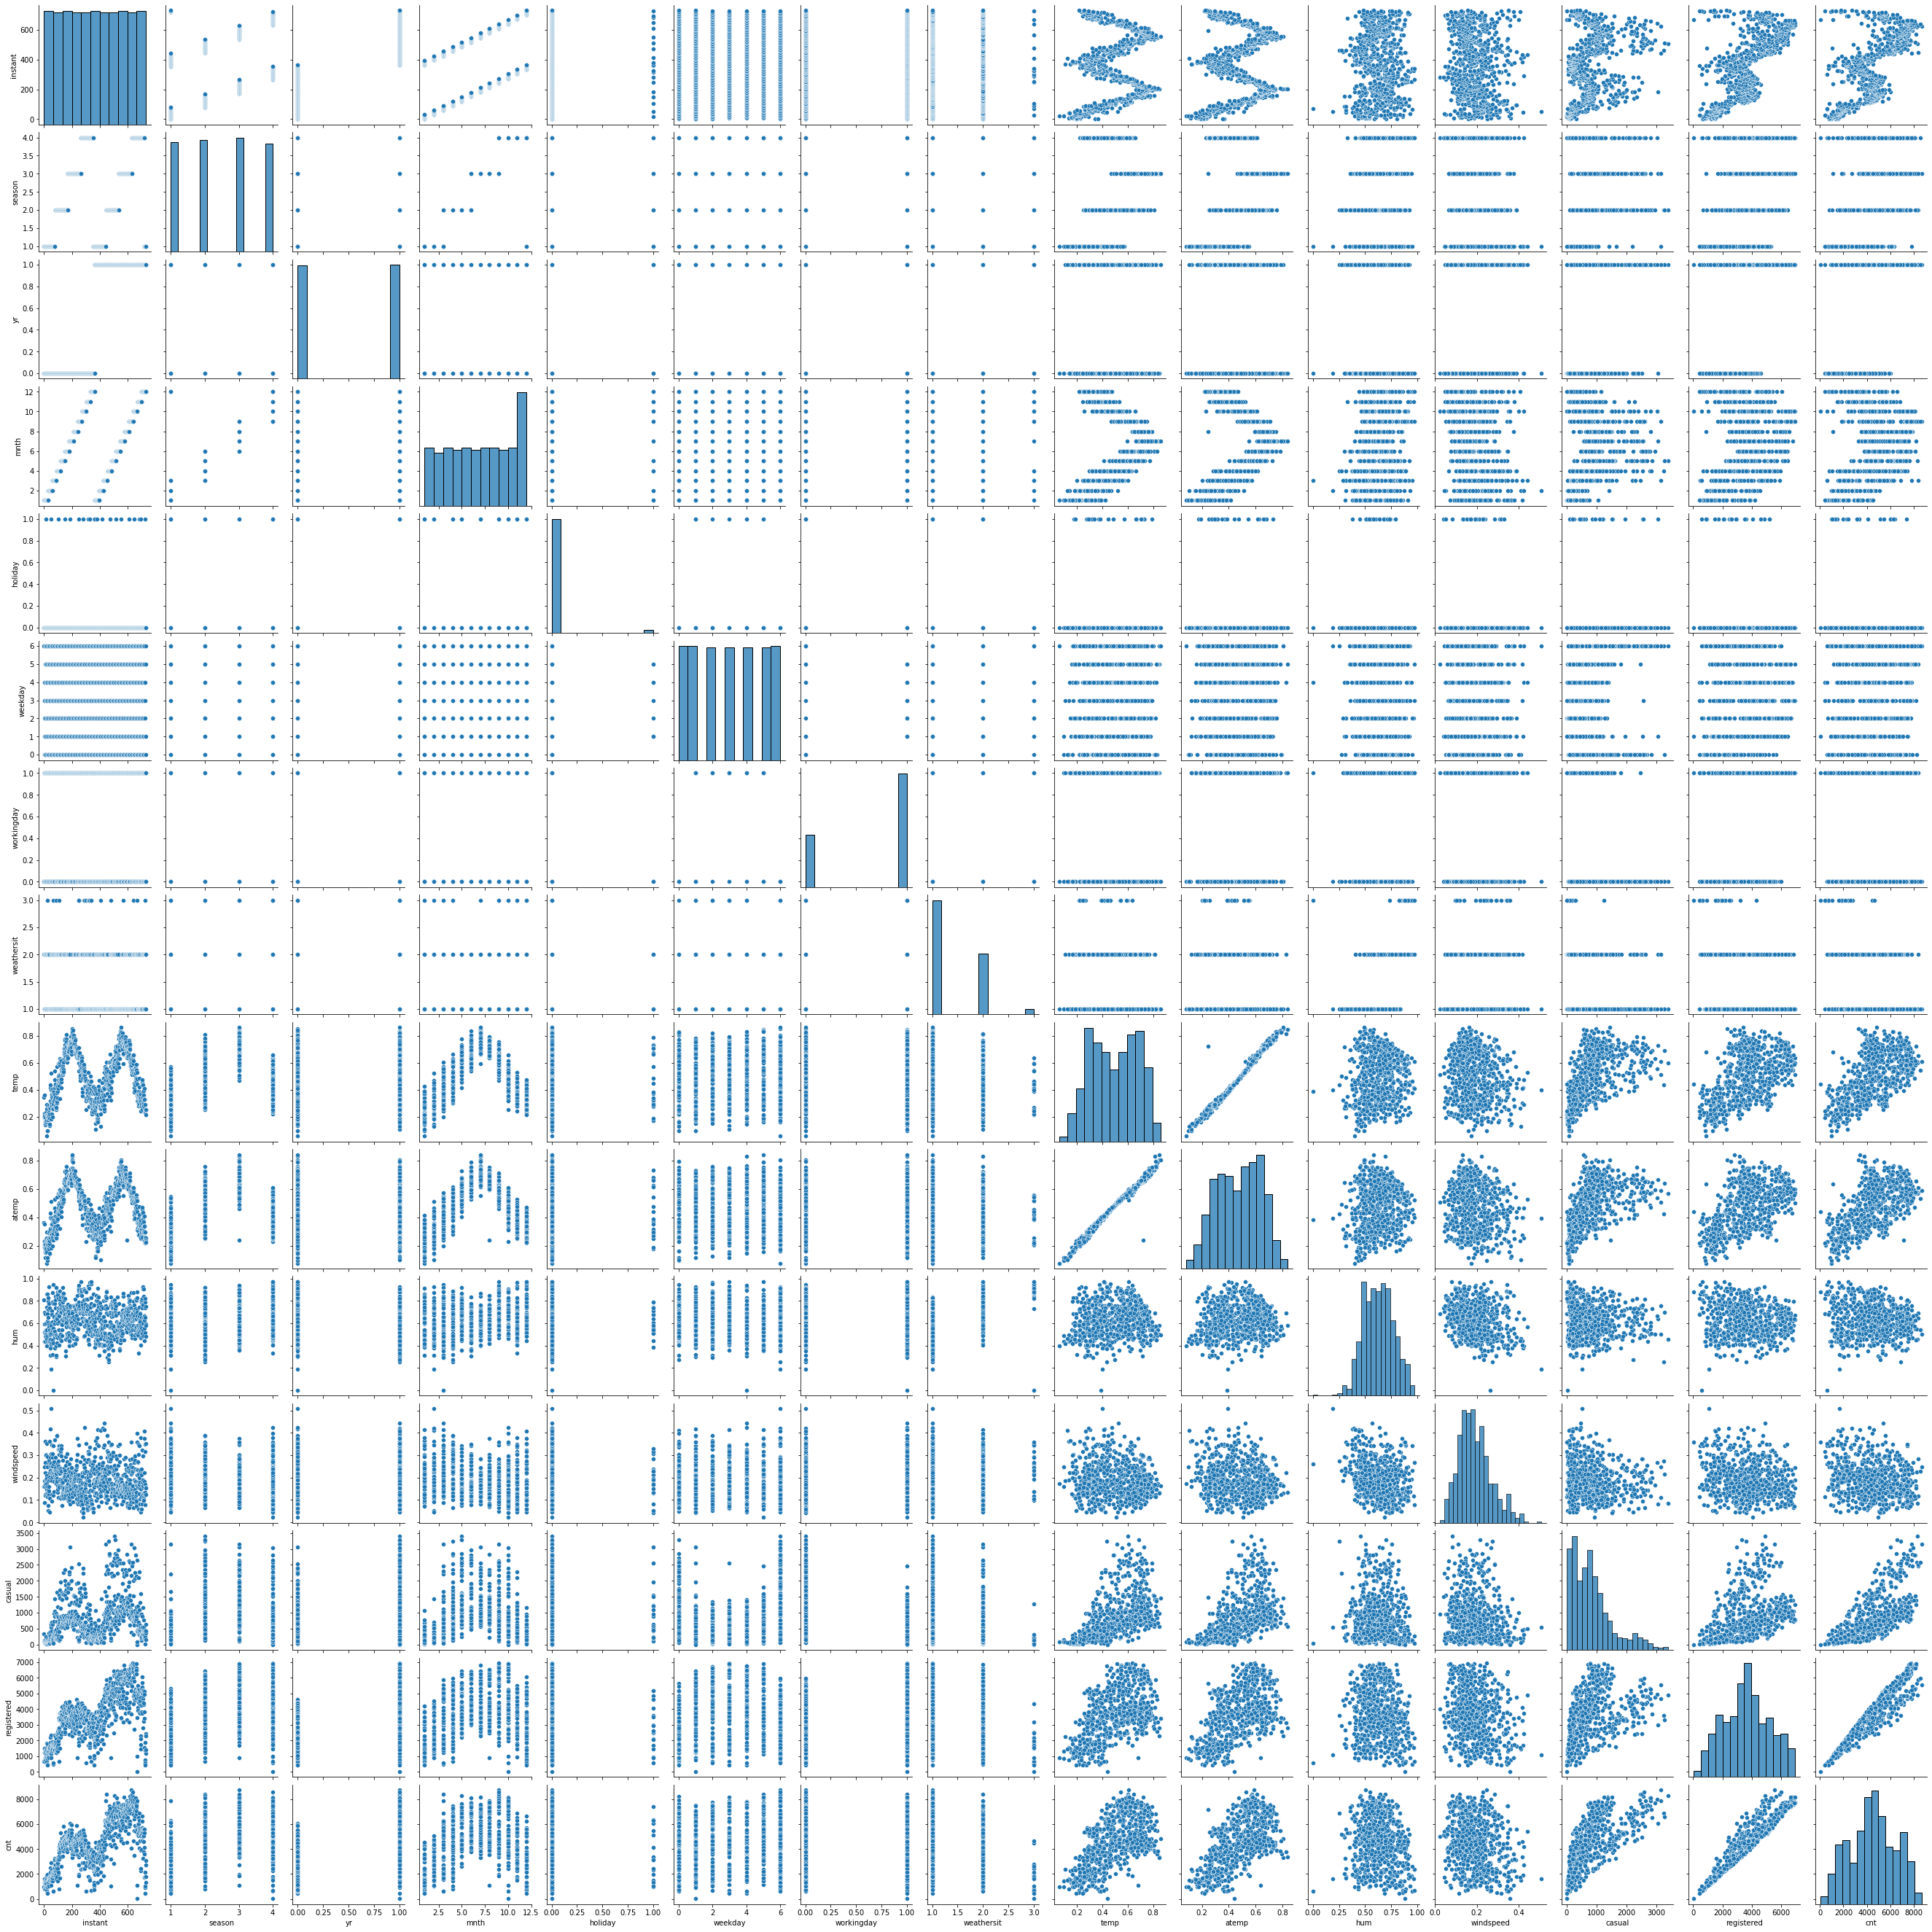

In [10]:
sns.pairplot(data=bike)

## 4. X – все кроме cnt, y - cnt

In [11]:
# Дополнительно исключим столбец dteday
# т.к. вся необходимая информация из него
# содержится в других столбцах
X = bike.drop(['dteday', 'cnt', 'instant'], axis=1)
y = bike.cnt

## 5. Разбить выборку в соотношении 70 на 30 (%) 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [13]:
X_train.shape, X_test.shape

((584, 13), (147, 13))

## 6. Провести стандартизацию X

In [14]:
## Масштабирование
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Написать функцию обучения модели и вывода RMSE, coef, R^2

In [15]:
from sklearn.metrics import mean_squared_error

def train_validate_report(model, X_train, X_test, y_train, y_test, cols, model_name, X_scaled = True, verbose = False, tree = False):
    model.fit(X_train, y_train)
    if tree:
        coefs = pd.DataFrame({"feature": cols,
             "coef": model.feature_importances_}).sort_values(by = "coef", ascending = False)
    else:
        coefs = pd.DataFrame({"feature": cols,
             "coef": model.coef_}).sort_values(by = "coef", ascending = False)

    rmse = mean_squared_error(model.predict(X_test), y_test, squared = False)
    score = model.score(X_test, y_test)
    return model, coefs, rmse, score

In [16]:
# *_, coefs, mod = train_validate_report(LassoCV(), X2_train_scaled, X2_test_scaled, y2_train, y2_test, 
#                                             X2_train.columns, model_name='LassoCV', X_scaled=True, verbose=True );

lasso, coefs, rmse, score = train_validate_report(LassoCV(), X_train, X_test, y_train, y_test, 
                                            X_train.columns, model_name='LassoCV', X_scaled=True, verbose=True );

In [17]:
coefs

,feature,coef
12,registered,0.999849
11,casual,0.994309
0,season,0.000000
1,yr,0.000000
2,mnth,0.000000
3,holiday,0.000000
4,weekday,0.000000
5,workingday,-0.000000
6,weathersit,-0.000000
7,temp,0.000000


In [18]:
print ('RMSE: {0}'.format(rmse))

RMSE: 3.581984471108381


In [19]:
print ('R^2: {0}'.format(score))

R^2: 0.999996246173658


In [20]:
# Несмотря на то, что модели LinearRegression имеют меньший RMSE, пропустим их\
# так как коэффициенты этих моделей имеют большие значения (до 10**16), что \
# может свидетельствовать о переобучении

In [21]:
# После предварительной обработки данных результаты улучшились до RMSE=781 (модель LassoCV) (было: RMSE=839)
# Таким образом, можно сделать вывод о том, что предварительная обработка данных
# положительно сказывается на качестве моделей, и её следует, по возможности, проводить

## 10. Построить графики обученных и реальных данных 

In [22]:
X_test.iloc[:, 0].shape, y_test.shape

((147,), (147,))

In [23]:
pd.DataFrame([lasso.predict(X_test), y_test])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146
0,7578.902713,5800.034994,6778.137523,4040.944335,3009.524261,7286.863712,8005.539078,1100.740533,5311.611034,5870.363284,3716.264682,3580.861736,3217.938714,6204.066414,5971.860002,3905.917168,3388.763128,6132.8416,3380.274339,4656.502299,4493.05889,3349.577614,6590.473283,3142.75042,5202.004355,7689.810326,5037.821657,6536.311821,4707.946001,3896.561859,1846.262245,2380.441975,5699.846238,4779.618613,2436.217464,5462.97048,6960.289246,3785.315386,6882.184875,7660.571696,...,6677.002456,3749.295986,6091.645494,4992.146494,6289.153109,511.123245,4471.075597,1609.852021,6570.711653,6967.74227,5115.277866,5477.718922,1540.225359,6777.054391,7358.42932,5260.350146,4863.983567,4978.536769,7441.715751,4582.012397,3834.551925,4903.824902,3648.563023,1838.75096,4059.623018,3115.851352,2195.278696,6528.717996,4739.591786,3764.767471,4835.37001,6296.087692,1031.568138,4048.173274,7325.281307,4401.978456,6237.662039,4984.377884,4325.33374,3349.03471
1,7582.000000,5810.000000,6778.000000,4040.000000,3005.000000,7290.000000,8009.000000,1096.000000,5312.000000,5870.000000,3717.000000,3577.000000,3214.000000,6203.000000,5976.000000,3910.000000,3387.000000,6133.0000,3376.000000,4656.000000,4492.00000,3351.000000,6591.000000,3141.00000,5202.000000,7702.000000,5035.000000,6544.000000,4708.000000,3894.000000,1842.000000,2376.000000,5698.000000,4788.000000,2432.000000,5463.00000,6969.000000,3784.000000,6889.000000,7665.000000,...,6685.000000,3747.000000,6093.000000,4996.000000,6290.000000,506.000000,4475.000000,1605.000000,6572.000000,6978.00000,5115.000000,5478.000000,1536.000000,6779.000000,7359.00000,5260.000000,4862.000000,4978.000000,7444.000000,4579.000000,3831.000000,4905.000000,3649.000000,1834.00000,4058.000000,3115.000000,2192.000000,6530.000000,4744.000000,3761.000000,4835.00000,6304.000000,1027.000000,4046.000000,7333.000000,4401.000000,6241.000000,4985.000000,4322.00000,3351.00000


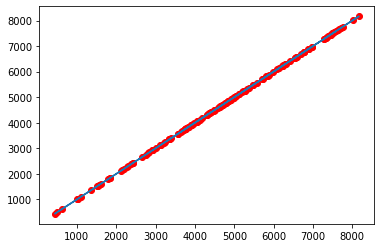

In [24]:
plt.scatter(y_test, y_test, c = 'r')
plt.plot(lasso.predict(X_test), lasso.predict(X_test))
plt.show()

# Моя модель RidgeCV

In [25]:
ridge = RidgeCV(alphas = np.logspace(-10, 1, 1000, base = 10), cv = 3)

In [26]:
ridge, coef, rmse, score = train_validate_report(ridge, X_train, X_test, y_train, y_test, 
                                            X_train.columns, model_name='RidgeCV', X_scaled=True, verbose=True );

In [27]:
coef

,feature,coef
12,registered,1.000000e+00
11,casual,1.000000e+00
8,atemp,1.561509e-10
10,windspeed,7.700606e-12
3,holiday,1.527785e-12
6,weathersit,1.345916e-12
2,mnth,8.692097e-14
5,workingday,6.667587e-14
4,weekday,3.828962e-14
0,season,-8.512431e-13


In [28]:
print ('RMSE: {0}'.format(rmse))

RMSE: 2.6296719433009958e-12


In [29]:
print ('R^2: {0}'.format(score))

R^2: 1.0


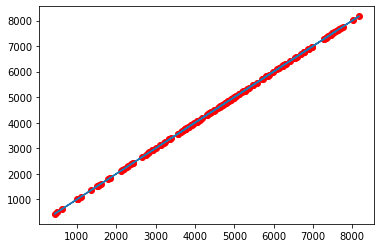

In [30]:
plt.scatter(y_test, y_test, c = 'r')
# plt.plot(y_test, y_test, c = 'b')
plt.plot(ridge.predict(X_test), ridge.predict(X_test))
plt.show()

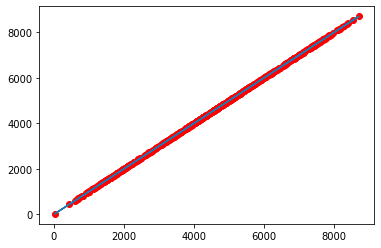

In [31]:
plt.scatter(y_train, y_train, c = 'r')
plt.plot(ridge.predict(X_train), ridge.predict(X_train))
plt.show()

In [32]:
pd.DataFrame([ridge.predict(X_test), y_test])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146
0,7582.0,5810.0,6778.0,4040.0,3005.0,7290.0,8009.0,1096.0,5312.0,5870.0,3717.0,3577.0,3214.0,6203.0,5976.0,3910.0,3387.0,6133.0,3376.0,4656.0,4492.0,3351.0,6591.0,3141.0,5202.0,7702.0,5035.0,6544.0,4708.0,3894.0,1842.0,2376.0,5698.0,4788.0,2432.0,5463.0,6969.0,3784.0,6889.0,7665.0,...,6685.0,3747.0,6093.0,4996.0,6290.0,506.0,4475.0,1605.0,6572.0,6978.0,5115.0,5478.0,1536.0,6779.0,7359.0,5260.0,4862.0,4978.0,7444.0,4579.0,3831.0,4905.0,3649.0,1834.0,4058.0,3115.0,2192.0,6530.0,4744.0,3761.0,4835.0,6304.0,1027.0,4046.0,7333.0,4401.0,6241.0,4985.0,4322.0,3351.0
1,7582.0,5810.0,6778.0,4040.0,3005.0,7290.0,8009.0,1096.0,5312.0,5870.0,3717.0,3577.0,3214.0,6203.0,5976.0,3910.0,3387.0,6133.0,3376.0,4656.0,4492.0,3351.0,6591.0,3141.0,5202.0,7702.0,5035.0,6544.0,4708.0,3894.0,1842.0,2376.0,5698.0,4788.0,2432.0,5463.0,6969.0,3784.0,6889.0,7665.0,...,6685.0,3747.0,6093.0,4996.0,6290.0,506.0,4475.0,1605.0,6572.0,6978.0,5115.0,5478.0,1536.0,6779.0,7359.0,5260.0,4862.0,4978.0,7444.0,4579.0,3831.0,4905.0,3649.0,1834.0,4058.0,3115.0,2192.0,6530.0,4744.0,3761.0,4835.0,6304.0,1027.0,4046.0,7333.0,4401.0,6241.0,4985.0,4322.0,3351.0
